In [50]:
from typing import Tuple
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

In [23]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target
X = X[y!=0]
y = y[y!=0]

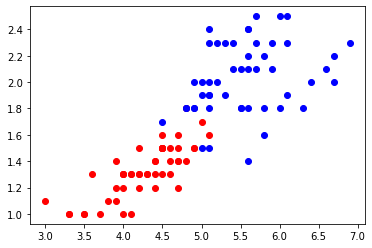

In [25]:
fig, ax = plt.subplots(1, 1)
for i, c in zip(np.unique(y), ['r', 'b']):
    x = X[y==i]
    ax.scatter(x[:, 0], x[:, 1], c=c)
plt.show()

In [27]:
svc = LinearSVC()
svc.fit(X, y)
print(svc.coef_)
print(svc.intercept_)

[[0.28021112 1.70098336]]
[-4.17109342]
/Users/wararaki/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [43]:
a = svc.coef_[0, 0]
b = svc.coef_[0, 1]
c = svc.intercept_[0]
x_min = X[:, 0].min()
x_max = X[:, 0].max()
x_svc = np.linspace(x_min, x_max, 1000)
y_svc = -(a*x_svc+c)/b

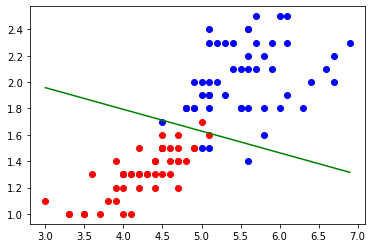

In [32]:
fig, ax = plt.subplots(1, 1)
for i, c in zip(np.unique(y), ['r', 'b']):
    x = X[y==i]
    ax.scatter(x[:, 0], x[:, 1], c=c)
ax.plot(x_svc, y_svc, c='g')
plt.show()

In [68]:
def get_svm_points(model: LinearSVC, X: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    a_model = model.coef_[0, 0]
    b_model = model.coef_[0, 1]
    c_model = model.intercept_[0]
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    x_model = np.linspace(x_min, x_max, 1000)
    y_model = -(a_model*x_model+c_model)/b_model
    return x_model, y_model

In [69]:
def plot_svm(svc: LinearSVC, model: LinearSVC, X: np.ndarray, X_pool: np.ndarray, X_train: np.ndarray, y_train: np.ndarray):
    x_svc, y_svc = get_svm_points(svc, X)
    x_model, y_model = get_svm_points(model, X)
    fig, ax = plt.subplots(1, 1)
    ax.scatter(X_pool[:, 0], X_pool[:, 1], c="k", marker=".")
    for i, c in zip(np.unique(y_train), ['r', 'b']):
        x = X_train[y_train==i]
        ax.scatter(x[:, 0], x[:, 1], c=c)
    ax.plot(x_svc, y_svc, "--", c='m')
    ax.plot(x_model, y_model, c='g')
    plt.show()

In [78]:
X_pool, X_test, y_pool, y_test = train_test_split(
    X, y, test_size=0.2, random_state=46
)
X_train = X_pool[:10]
y_train = y_pool[:10]
X_pool = X_pool[10:]
y_pool = y_pool[10:]

Iteration 1:


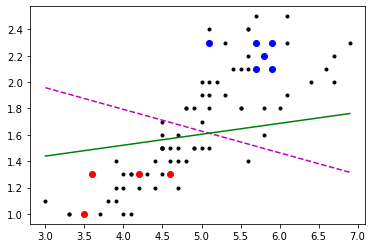

Iteration 2:


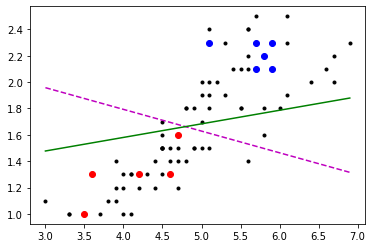

Iteration 3:


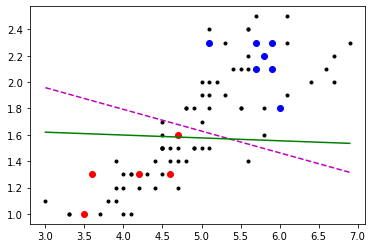

Iteration 4:


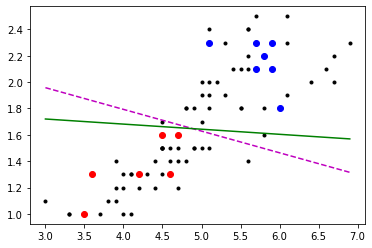

Iteration 5:
/Users/wararaki/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


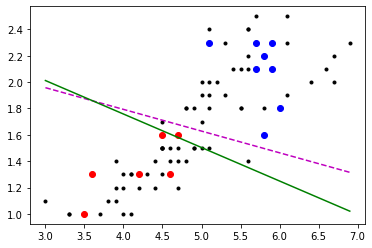

Iteration 6:


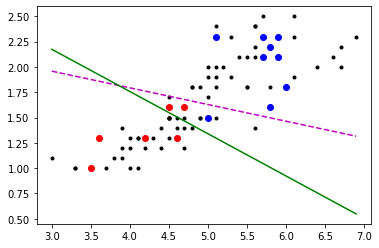

Iteration 7:


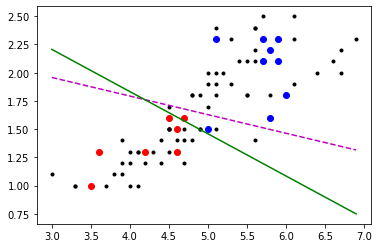

Iteration 8:


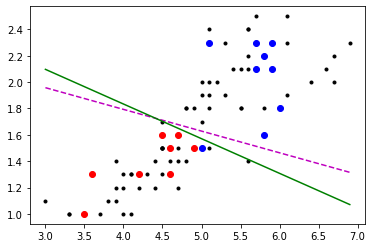

Iteration 9:


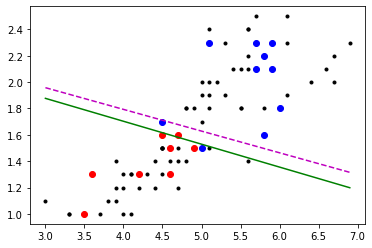

Iteration 10:


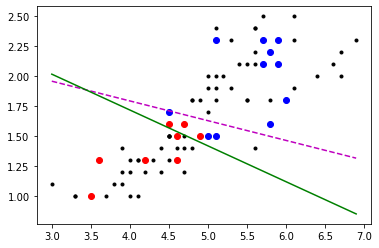

In [79]:
n_iter = 10
for i in range(1, n_iter+1):
    print(f"Iteration {i}:")
    model = LinearSVC()
    model.fit(X_train, y_train)
    plot_svm(svc, model, X, X_pool, X_train, y_train)
    index = np.argmin(np.abs(model.decision_function(X_pool)))
    X_train = np.append(X_train, [X_pool[index]], axis=0)
    y_train = np.append(y_train, y_pool[index])
    X_pool = np.delete(X_pool, index, axis=0)
    y_pool = np.delete(y_pool, index)